In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import os
from skimage.io import imread, imshow
def load_images_from_folder(folder, start_position_of_subfolder):
    images = []
    label = [] 
    for filename in os.listdir(folder):
        img = imread(folder+'/'+filename)
        imshow(img)
        if img is not None:
            images.append(img)
        
        label.append(int(folder[start_position_of_subfolder:start_position_of_subfolder + 2]))
    return images, label


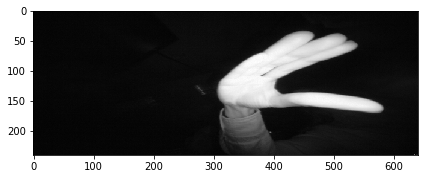

In [3]:
folders_location = '/content/drive/MyDrive/ml_mini_project/00'
folders_list = os.listdir(folders_location)
start_position_of_subfolder = len(folders_location)+1

images = []
label = []
for folder in folders_list :
  images_and_label = load_images_from_folder(folders_location + '/' + folder, start_position_of_subfolder)
  images.extend(images_and_label[0])
  label.extend(images_and_label[1])

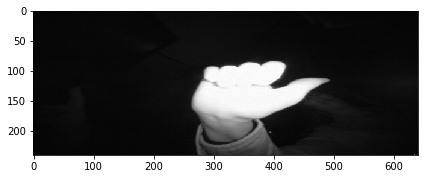

In [4]:
imshow(images[0])
imshow(images[1000])

In [5]:
all_image_shape_are_equal = True
for image in images :
  if image.shape != (240, 640) :
    all_image_shape_are_equal = False
    break
  
print(all_image_shape_are_equal)

True


In [6]:
print(images[0].size)
print(240 * 640)

153600
153600


In [7]:
all_image_size_are_equal = True
for image in images :
  if image.size != (153600) :
    all_image_size_are_equal = False
    break
  
print(all_image_size_are_equal)

True


In [10]:
from PIL import Image 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import IPython. display 
import numpy as np
import pandas as pd
import os

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import numpy as np  
images_array = np.asarray(images)
label_array = np.asarray(label)

print(images_array[0].flatten().shape)
print(label_array.shape)

(153600,)
(2010,)


In [10]:
x = np.zeros([len(images_array), images_array[0].flatten().shape[0]])
for i in range(len(images_array)) :
  x[i] = images_array[i].flatten()

In [11]:
print(x.shape)
print(x)

(2010, 153600)
[[ 6.  5.  4. ... 25. 12. 20.]
 [ 4.  5.  5. ... 25. 12. 16.]
 [ 4.  5.  5. ... 25. 12. 16.]
 ...
 [ 6.  6.  6. ... 25. 12. 16.]
 [ 6.  5.  4. ... 25. 12. 16.]
 [ 6.  6.  4. ... 25. 12. 16.]]


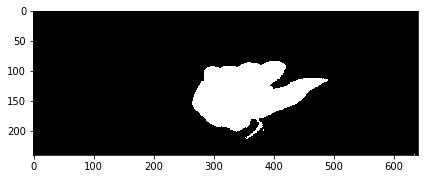

In [12]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(images[1000])
binarized = images[1000] > thresh
imshow(binarized)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit = scaler.fit(x)
normalised_x = scaler_fit.transform(x)

In [14]:
from sklearn.model_selection import train_test_split
X_train_and_validtion, X_test, y_train_and_validation, y_test = train_test_split(x, label_array, test_size=0.5, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_and_validtion,y_train_and_validation,test_size=0.2, random_state=42)

In [15]:
from sklearn. metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error


In [16]:
def performance(y_pred_test,y_pred_train):
  acc_test =accuracy_score(y_test, y_pred_test, normalize=True, sample_weight=None) 
  acc_train = accuracy_score(y_train, y_pred_train, normalize=True, sample_weight=None) 
  pre_test = precision_score(y_test, y_pred_test, average = 'micro')
  pre_train = precision_score(y_train, y_pred_train, average = 'micro')
  rec_test = recall_score(y_test, y_pred_test, average = 'micro')
  rec_train = recall_score(y_train, y_pred_train, average = 'micro')
  mean_test = mean_squared_error(y_test, y_pred_test)
  mean_train = mean_squared_error(y_train, y_pred_train)
  print("accuracy of the model is:\nTest", acc_test)
  print('Train',acc_train) 
  print("Precision of the model is:\nTest", pre_test)
  print('Train',pre_train)
  print("Recall of the model is:\nTest", rec_test)
  print('Train',rec_train)
  print("MSE of the model is:\nTest", mean_test)
  print('Train',mean_train)
 

In [63]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42, max_iter=10)
logistic.fit(X_train, y_train)
y_pred_log = logistic.predict(X_test)
y_train_score_log = logistic.predict(X_train)

In [64]:
from sklearn.metrics import confusion_matrix
print('confusion matrix for the model : \n', confusion_matrix(y_test, y_pred_log))
performance(y_pred_log,y_train_score_log)

confusion matrix for the model : 
 [[ 93   0   0   0   0   0   0   0   0   0]
 [  0 110   2   0   0   0   0   0   0   0]
 [  0   0 110   0   0   0   0   0   0   0]
 [  0   0   0  97   0   0   0   0   0   0]
 [  0   0   1   0 101   0   0   0   0   0]
 [  0   0   0   0   0  82   0   0   0   0]
 [  0   0   0   0   0   0  98   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0]
 [  2   0   0   0   0   0   0   1  92   0]
 [  0   0   0   0   0   0   0   0   0 108]]
accuracy of the model is:
Test 0.9940298507462687
Train 0.9975124378109452
Precision of the model is:
Test 0.9940298507462687
Train 0.9975124378109452
Recall of the model is:
Test 0.9940298507462687
Train 0.9975124378109452
MSE of the model is:
Test 0.13432835820895522
Train 0.03233830845771144


In [65]:
# SGD
from sklearn.linear_model import SGDClassifier 
sgd= SGDClassifier(loss='squared_loss', max_iter=10) 
sgd.fit(X_train, y_train) 
y_pred_sgd = sgd.predict(X_test) 
y_train_score_sgd=sgd.predict(X_train) 


In [66]:
print('confusion matrix for the model : \n', confusion_matrix(y_test, y_pred_sgd))
performance(y_pred_sgd,y_train_score_sgd)

confusion matrix for the model : 
 [[17 36  0  0  0  0  0 29 11  0]
 [50 57  0  0  0  0  0  0  5  0]
 [54 56  0  0  0  0  0  0  0  0]
 [ 7 48  0  0  0  0  0  0 42  0]
 [ 0 95  0  7  0  0  0  0  0  0]
 [33 49  0  0  0  0  0  0  0  0]
 [ 0 51  0 38  0  2  0  0  7  0]
 [48  7  0  0  0  0  0  2 51  0]
 [15 43  0  6  0 31  0  0  0  0]
 [ 0 86  0  0  0  0  0  0 22  0]]
accuracy of the model is:
Test 0.07562189054726368
Train 0.06840796019900497
Precision of the model is:
Test 0.07562189054726368
Train 0.06840796019900497
Recall of the model is:
Test 0.07562189054726368
Train 0.06840796019900497
MSE of the model is:
Test 19.729353233830846
Train 20.53731343283582


In [67]:
# SLP
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X_train, y_train)
y_pred_p=p.predict(X_test)
y_train_score_p= p.predict(X_train)


In [68]:
print('confusion matrix for the model : \n', confusion_matrix(y_test, y_pred_p))
performance(y_pred_p,y_train_score_p)

confusion matrix for the model : 
 [[ 93   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   0   0   0   0   0   0]
 [  0   0 110   0   0   0   0   0   0   0]
 [  0   0   0  97   0   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   0   0]
 [  0   0   0   0   0  82   0   0   0   0]
 [  0   0   0   0   0   0  98   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0]
 [  3   0   0   0   0   0   0   1  91   0]
 [  0   0   0   0   0   0   0   0   0 108]]
accuracy of the model is:
Test 0.9960199004975124
Train 1.0
Precision of the model is:
Test 0.9960199004975124
Train 1.0
Recall of the model is:
Test 0.9960199004975124
Train 1.0
MSE of the model is:
Test 0.19203980099502488
Train 0.0


In [23]:
# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=10)
mlp.fit(X_train, y_train)
y_pred_mlp=mlp.predict(X_test)
y_train_score_mlp= mlp.predict(X_train)

In [24]:

performance(y_pred_mlp,y_train_score_mlp)

accuracy of the model is:
Test 0.14626865671641792
Train 0.1318407960199005
Precision of the model is:
Test 0.14626865671641792
Train 0.1318407960199005
Recall of the model is:
Test 0.14626865671641792
Train 0.1318407960199005
MSE of the model is:
Test 12.456716417910448
Train 11.732587064676617


In [55]:
# Create Data
y=['14.00','96.14','99.2','100']
x = ['SGD','MLP','SLP','Logistic']
import matplotlib.pyplot as plt


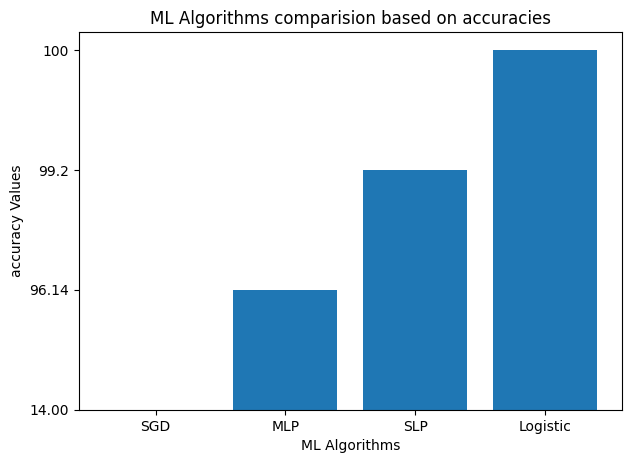

In [56]:
# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('ML Algorithms')
plt.ylabel("accuracy Values")
plt.title('ML Algorithms comparision based on accuracies')
plt.show()

In [59]:
# Create Data
y=['0.134','0.192','2.0','14.2']
x = ['Logistic','SLP','MLP','SGD']
import matplotlib.pyplot as plt


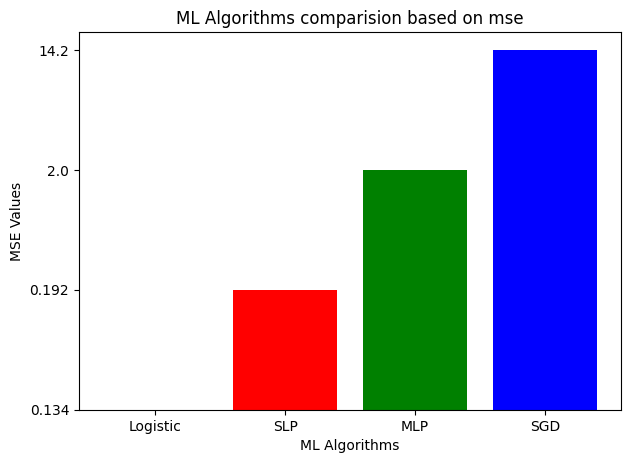

In [60]:
# Simple Bar Plot
import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
plt.bar(x,y)
plt.xlabel('ML Algorithms')
plt.ylabel("MSE Values")
plt.title('ML Algorithms comparision based on mse')
plt.bar(x, y, color=['black', 'red', 'green', 'blue', 'cyan'])
ax.set_ylim(ymin = 0)
plt.show()